# Tutorial de Big Data
## Tutorial 5

**Objetivo:**
Que se familiaricen con clusters (modelo no supervisado)

### Aprendizaje no supervisado
En gran parte del curso estudiamos modelos supervisados. Ahora veremos una herramienta no supervisada.

Cuando hablamos de **aprendizaje no supervisado** nos referimos a los casos en los que solo tenemos una cierta cantidad de _features_ o X, pero no contamos con una variable dependiente Y.

Por lo tanto, el objetivo no es predecir. El objetivo puede ser realizar un análisis explotatorio de los datos, ver las relaciones entre las X y ver si encontramos subgrupos (clusters) en los datos.

No contar con la variable de respuesta Y implica que tampoco podemos chequear si lo que estamos haciendo funciona bien o mal.
Por ende, perdemos la posibilidad de métodos de validación cruzada como lo veníamos haciendo.

En esta clase veremos ejemplos de Clusters.

### Métodos de Clustering: K-means

Clustering hace referencia a un conjunto de técnicas para encontrar subgrupos, o clusters, en los datos. Se busca partir a las observaciones en distintos grupos tal que las observaciones dentro de cada grupo sean similares entre sí y las observaciones en distintos grupos sean diferentes.

### K-means

En K-means clustering buscamos partir las observaciones en un número de clusters previamente especificado. Se determina el K deseado y el algoritmo asigna cada observación a a uno de los K clusters (sin superposición) buscando minimizar la variación intra-cluster. Para definir la variación intra-cluster la forma más usual es usar la distancia euclideana.

Usaremos el estimador [KMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) del módulo Cluster de Scikit Learn.


El procedimiento consiste en:
1. Asignación inicial a los clusters. Asignar aleatoriamente un número de 1 a K a cada una de las observaciones. 
2. Iterar hasta que el cluster deja de modificarse:

a) Para cada uno de los K clusters, se computa el centroide. El centroide del k-ésimo cluster es un vector con las p medias de las características (_features_) de las observaciones en el cluster.

b) Reasignar a cada observación al cluster cuyo centroide es más cercano (en términos de la distancia euclideana al centroide).
  

Ejemplo: **Progreso de K-means clustering con K=3**

0. Observaciones
1. Cada observación se asigna aleatoriamente a un cluster.
2. Se computan los centroides de cada cluster (círculos más grandes). Al principio los centroides se superponen porque la asignación a los clusters fue elegida de forma aleatoria.
3. Cada observación se asigna al centroide más cercano.
4. Empieza una nueva iteración, se repite el paso 2, obteniendo nuevos centroides para cada clusters.
5. Resultados luego de 10 iteraciones.

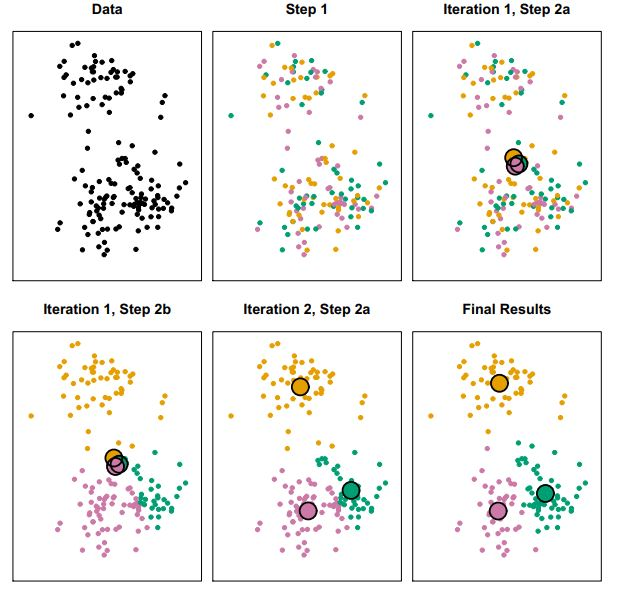

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

Comencemos con un ejemplo simulado, en el que hay dos clusters en los datos: el primero, con 25 observaciones, tiene un desplazamiento de la media en relación a las 25 observaciones siguientes, que forman el segundo cluster.

In [3]:
np.random.seed(0)
X = np.random.standard_normal((50,2)) 
# Observaciones random de un distribución Normal estándar con media=0 y stdev=1
# 50 observaciones, 2 columnas
X[:25,0] += 3
X[:25,1] -= 4
X

array([[ 4.76405235, -3.59984279],
       [ 3.97873798, -1.7591068 ],
       [ 4.86755799, -4.97727788],
       [ 3.95008842, -4.15135721],
       [ 2.89678115, -3.5894015 ],
       [ 3.14404357, -2.54572649],
       [ 3.76103773, -3.87832498],
       [ 3.44386323, -3.66632567],
       [ 4.49407907, -4.20515826],
       [ 3.3130677 , -4.85409574],
       [ 0.44701018, -3.3463814 ],
       [ 3.8644362 , -4.74216502],
       [ 5.26975462, -5.45436567],
       [ 3.04575852, -4.18718385],
       [ 4.53277921, -2.53064123],
       [ 3.15494743, -3.62183748],
       [ 2.11221425, -5.98079647],
       [ 2.65208785, -3.84365103],
       [ 4.23029068, -2.79762015],
       [ 2.61267318, -4.30230275],
       [ 1.95144703, -5.42001794],
       [ 1.29372981, -2.0492246 ],
       [ 2.49034782, -4.4380743 ],
       [ 1.74720464, -3.22250964],
       [ 1.38610215, -4.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

Text(0.5, 1.0, 'Observaciones')

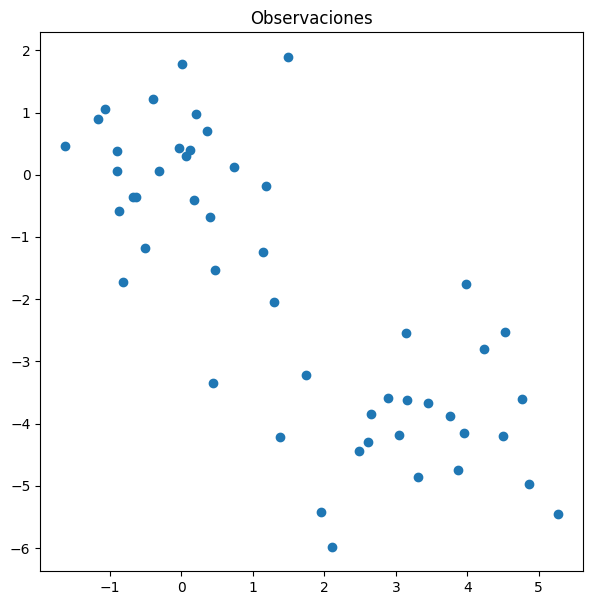

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.scatter(X[:,0], X[:,1]) 
ax.set_title("Observaciones") 

Ahora realizamos K-means clustering con K=2. Para más información ver:  [KMeans()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) del módulo Cluster de Scikit Learn.

In [5]:
kmeans2 = KMeans(n_clusters=2, random_state=10, init="random", n_init=20).fit(X)
# n_clusters: número de clusters 
# random_state: semilla (para poder reproducir los resultados)
# n_init: controla cuántas veces se ejecutará el algoritmo de K-means con diferentes semillas de centroides.
# Cada ejecución se realiza con una asignación aleatoria de centroides diferente.
# El resultado final es aquel con menor 'inertia'.

Para ver a qué cluster fueron asignadas las 50 observaciones podemos usar el atributo labels_ del objeto kmeans


In [6]:
kmeans2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

Text(0.5, 1.0, 'K-Means Clustering con K=2')

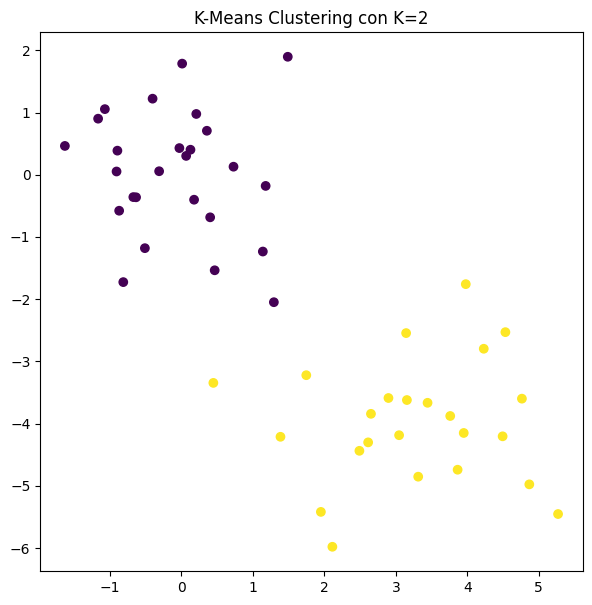

In [7]:
# Gráfico de las observaciones con las etiquetas correspondientes a cada cluster
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.scatter(X[:,0], X[:,1], c=kmeans2.labels_) 
ax.set_title("K-Means Clustering con K=2")

K-means clustering separó a las observaciones en dos grupos, las etiquetas son un resultado del procedimiento de clustering.
En este ejemplo es fácil gráficar porque solo tenemos dos dimensiones. Si hubiera más de dos variables podríamos realizar PCA y graficar los primeros dos vectores de componentes principales para representar a los clusters.

En este ejemplo sabíamos que eran dos clusters porque habíamos generado artificialmente los datos.
En otros casos reales, no sabemos de forma precisa el número de clusters ni si existen.
Podríamos haber hecho K-means Clustering con K=3 (**n_clusters**=3)


Text(0.5, 1.0, 'K-Means Clustering con K=3')

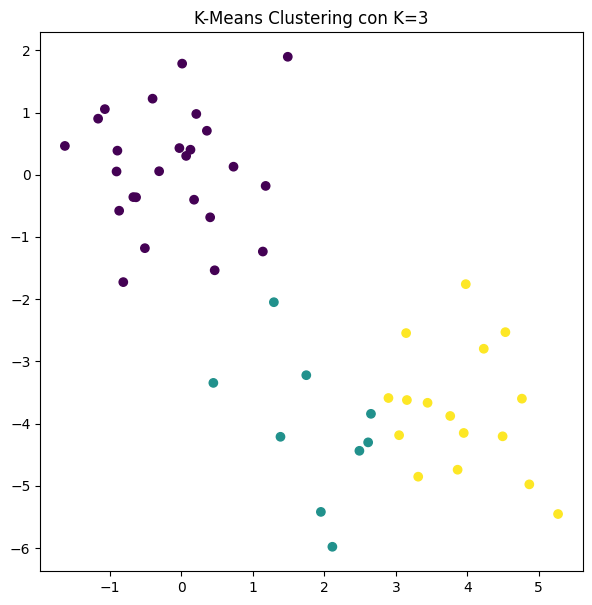

In [8]:
kmeans3 = KMeans(n_clusters=3, random_state=10, init="random", n_init=20).fit(X)

# Gráfico
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X[:,0], X[:,1], c=kmeans3.labels_)
ax.set_title("K-Means Clustering con K=3")


Notar que cuando K=3, el algoritmo parte los dos clusters iniciales

Otro parámetro de la función que definimos fue **n_init**. 
Este parámetro indica la cantidad de veces que se corre el algoritmo con distintas asignaciones iniciales. Este argumento en el ejemplo toma valor 20 (el valor por default es 10). Cuando n_init > 1, K-means clustering se realiza usando multiples asignaciones aleatorias iniciales y la función KMeans() reporta solo los mejores resultados.
Como los grupos obtenidos dependen de esa asignación aleatoria inicial, la recomendación es correr el algoritmo varias veces con distintas asignaciones iniciales (n_init de 20 o 50)

Vamos a comparar los resultados usando n_init=1, n_init=10, y n_init=20.

(También es importante setear una semilla usando el argumento random_state de KMeans(). Así, el las asignaciones iniciales a clusters pueden ser replicadas y el resultado será reproducible.)


In [9]:
kmeans3_i1 = KMeans(n_clusters=3, random_state=10, init="random", n_init=1).fit(X)
kmeans3_i10 = KMeans(n_clusters=3, random_state=10, init="random", n_init=10).fit(X)
kmeans3_i20 = KMeans(n_clusters=3, random_state=10, init="random", n_init=20).fit(X)
kmeans3_i1.inertia_, kmeans3_i10.inertia_, kmeans3_i20.inertia_

(77.18931183464504, 75.0350825910044, 75.0350825910044)

kmeans.inertia_ es la suma de los cuadrados total dentro de un cluster. Inertia es una métrica que representa qué tan coherentes son las observaciones dentro de un cluster. Nos interesa tener el menor valor posible, minimizar esta medida.

/var/folders/fm/4w6xdvfn5lx37kg5cbrn4jnc0000gn/T/ipykernel_39106/297971881.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


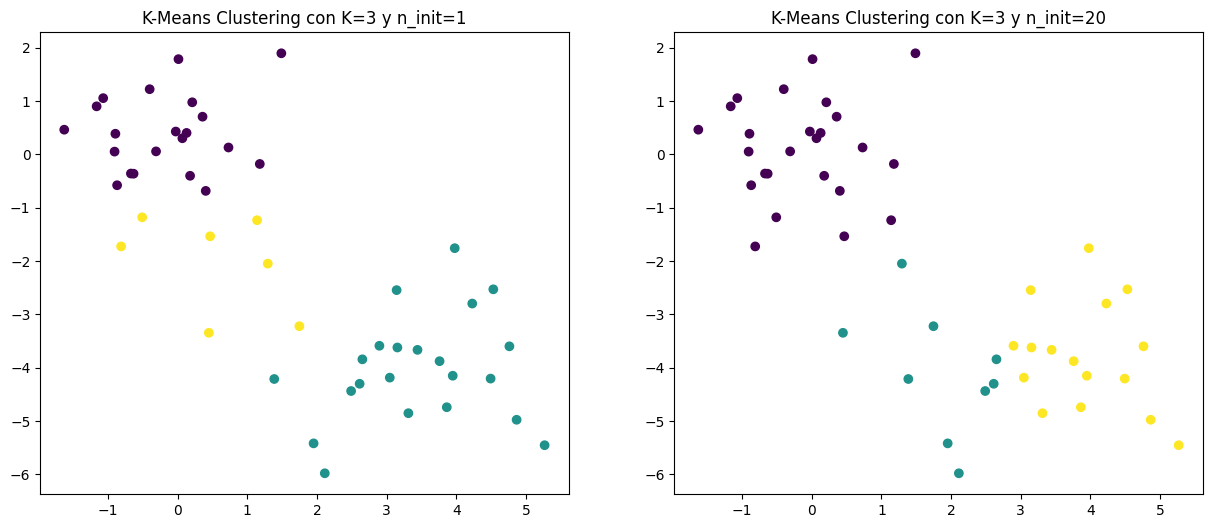

In [10]:
# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # 2 subplots uno al lado del otro
ax = axes[0]
ax.scatter(X[:,0], X[:,1], c=kmeans3_i1.labels_)
ax.set_title("K-Means Clustering con K=3 y n_init=1")
# capture suprime la visualización de la figura parcialmente terminada

ax = axes[1]
ax.scatter(X[:,0], X[:,1], c=kmeans3_i20.labels_)
ax.set_title("K-Means Clustering con K=3 y n_init=20")
fig.show()


### Métodos de Clustering: Hierarchical Clustering

En el caso de Clustering jerárquico, a diferencia de K-medias, **no es necesario especificar previamente el número de clusters**. Obtendremos una representación visual de las observaciones a partir de un **dendrograma** que permite ver los subgrupos obtenidos para cada número posible de clusters (de 1 a n).

La forma más común de clustering jerárquico es _bottom-up_ o _agglomerative clustering_. Hace referencia a que el dendrograma se construye de abajo hacia arriba, comenzando por las hojas.

Usaremos [linkage()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) y [dendrogram()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) de Scipy.
También podríamos usar [AgglomerativeClustering()](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) de Scikit Learn (módulo Cluster).

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

##### Ejemplo 1

In [12]:
# Creamos datos
x1 = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
x2 = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x1, x2)) # conjunto de datos bidimensional 
data
# Tuplas con un par de observaciones cada una 
# El 1° valor en la tupla es una observación de la lista x1 y el 2°, uno de la lista x2. 

[(4, 21),
 (5, 19),
 (10, 24),
 (4, 17),
 (3, 16),
 (11, 25),
 (14, 24),
 (6, 22),
 (10, 21),
 (12, 21)]

Text(0, 0.5, 'x2')

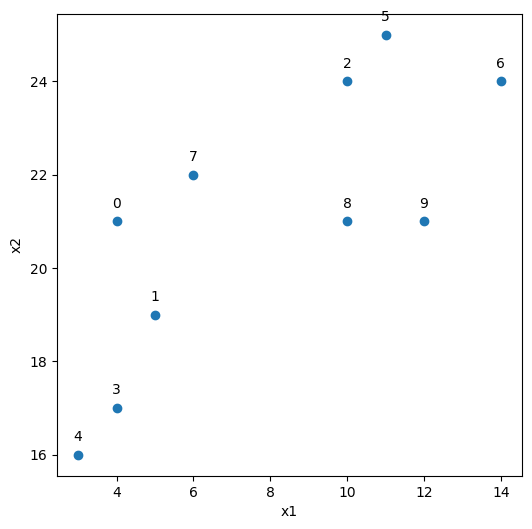

In [13]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x1, x2)
for i, txt in enumerate(range(len(x1))):
    ax.annotate(txt, (x1[i], x2[i]), textcoords="offset points", xytext=(0,10), ha='center')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

In [14]:
data_std = StandardScaler().fit_transform(data)
data_std

array([[-1.04643796,  0.        ],
       [-0.77812053, -0.70710678],
       [ 0.56346659,  1.06066017],
       [-1.04643796, -1.41421356],
       [-1.31475538, -1.76776695],
       [ 0.83178402,  1.41421356],
       [ 1.63673629,  1.06066017],
       [-0.50980311,  0.35355339],
       [ 0.56346659,  0.        ],
       [ 1.10010144,  0.        ]])

Ahora usamos linkage() de SciPy para realizar un agrupamiento jerárquico

Posibles opciones de funciones de enlace(Linkage)
- **Complete**:
Maximal intercluster dissimilarity. Compute all pairwise
dissimilarities between the observations in cluster A and the
observations in cluster B, and record the largest of these dissimilarities.
- **Single**:
Minimal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the
observations in cluster B, and record the smallest of these
dissimilarities. Single linkage can result in extended, trailing
clusters in which single observations are fused one-at-a-time.
- **Average**:
Mean intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the
observations in cluster B, and record the average of these
dissimilarities.
- **Centroid**:
Dissimilarity between the centroid for cluster A (a mean
vector of length p) and the centroid for cluster B. Centroid
linkage can result in undesirable inversions.

/var/folders/fm/4w6xdvfn5lx37kg5cbrn4jnc0000gn/T/ipykernel_39106/677950034.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


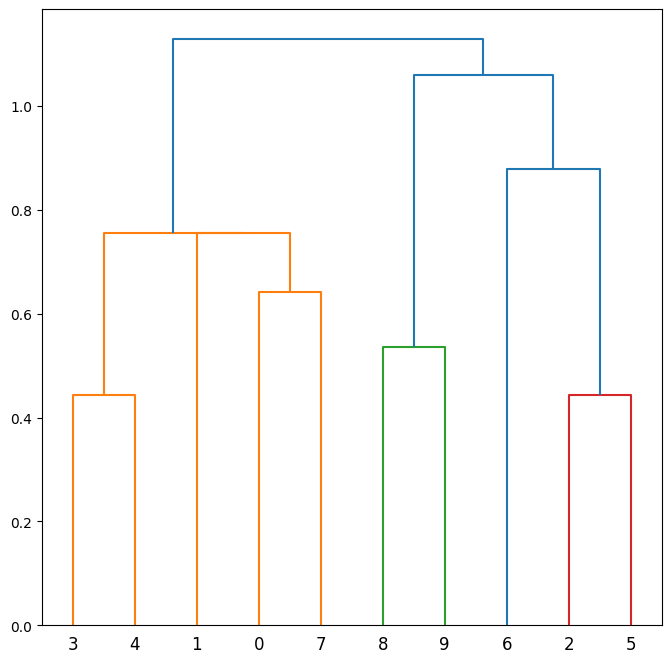

In [15]:
linkage_data = linkage(data_std, metric='euclidean')
# Algunos parámetros que están determinados por default:
# metric='euclidean', method='simple'

# Graficamos
fig, ax = plt.subplots(figsize=(8,8))
dendrogram(linkage_data)
fig.show()

/var/folders/fm/4w6xdvfn5lx37kg5cbrn4jnc0000gn/T/ipykernel_39106/2603305093.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


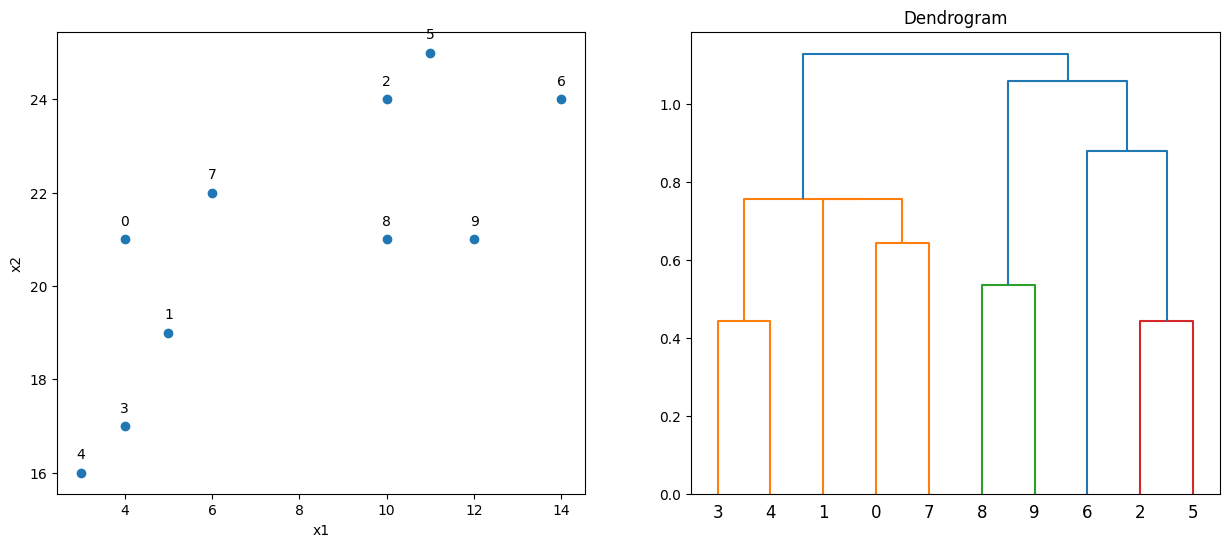

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # 2 subplots uno al lado del otro
ax = axes[0]
ax.scatter(x1, x2)
for i, txt in enumerate(range(len(x1))):
    ax.annotate(txt, (x1[i], x2[i]), textcoords="offset points", xytext=(0,10), ha='center')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax = axes[1]
dendrogram(linkage_data)
ax.set_title("Dendrogram")
fig.show()

Si  hacemos un corte horizontal en el dendograma podemos controlar cuántos clusters quedan.

[0 0 1 0 0 1 2 0 3 3]


/var/folders/fm/4w6xdvfn5lx37kg5cbrn4jnc0000gn/T/ipykernel_39106/898998753.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


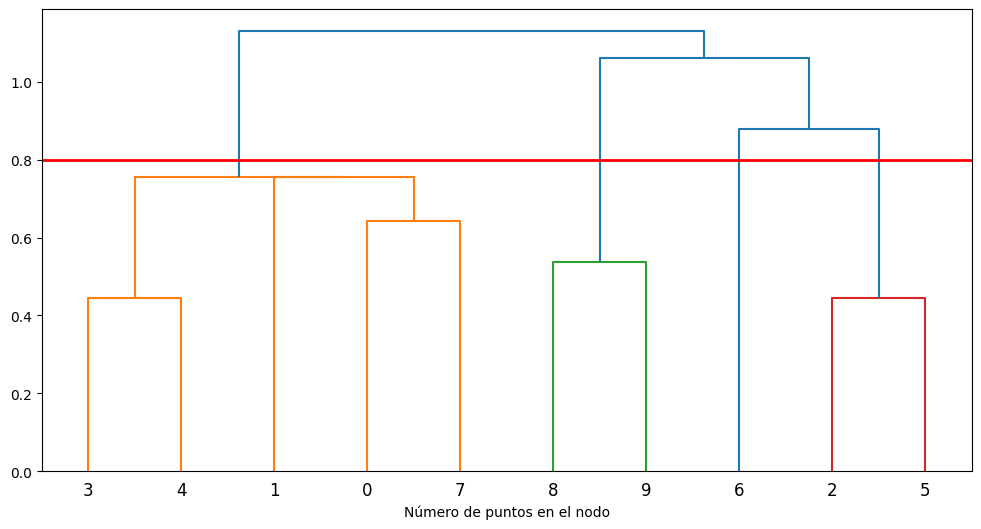

In [17]:
from scipy.cluster.hierarchy import cut_tree

# Para ver las etiquetas de clusters
# Si cortamos donde la altura es 4
labels_cut08 = cut_tree(linkage_data, height=0.8).reshape(-1)
print(labels_cut08)

fig, ax = plt.subplots(figsize=(12,6))
dendrogram(linkage_data)
ax.set_xlabel("Número de puntos en el nodo")
ax.axhline(0.8, c='red', linewidth=2) # línea horizontal en 4
fig.show()


In [18]:
# Si queremos 3 clusters
labels_clust3 = cut_tree(linkage_data, n_clusters=3).reshape(-1)
print(labels_clust3)

[0 0 1 0 0 1 1 0 2 2]


##### Ejemplo 2

Datos del dataset Iris, de Scikit-learn.

Features:
- Sepal length (in cm)
- Sepal width (in cm)
- Petal length (in cm)
- Petal width (in cm)

Target variable: the species of iris plant, which can take one of three possible values:
- Setosa
- Versicolor
- Virginica

In [19]:
# Ejemplo 2
# Datos de Iris (3 tipos de flores)
iris = load_iris()

# Features
feature_names = iris.feature_names
print("Feature names:", feature_names)

# Target variable
target_names = iris.target_names
print("Target names:", target_names)
y = iris.target

X = iris.data
print("Dimension X:", X.shape)
print(X, y)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Dimension X: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6

In [20]:
X_std = StandardScaler().fit_transform(X)

linkage_data = linkage(X_std, metric='euclidean', method='complete')

/var/folders/fm/4w6xdvfn5lx37kg5cbrn4jnc0000gn/T/ipykernel_39106/1394134977.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


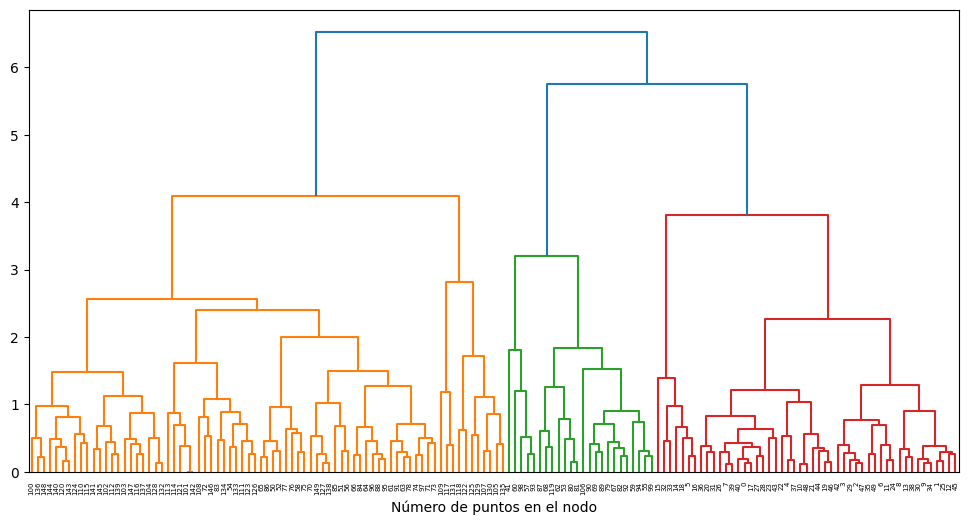

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
dendrogram(linkage_data)
ax.set_xlabel("Número de puntos en el nodo")
fig.show()

/var/folders/fm/4w6xdvfn5lx37kg5cbrn4jnc0000gn/T/ipykernel_39106/2224494070.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


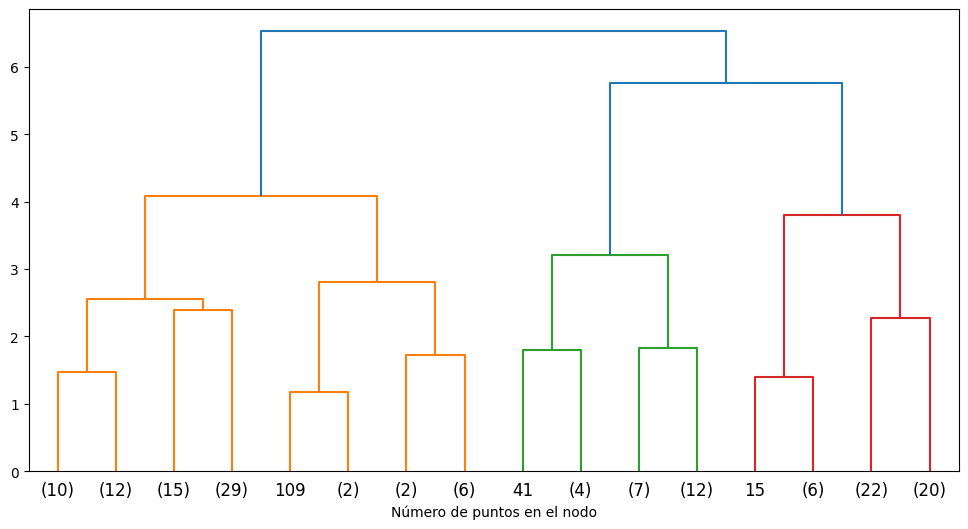

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
dendrogram(linkage_data, truncate_mode="level", p=3)
ax.set_xlabel("Número de puntos en el nodo")
fig.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 2 1 2 2 2 2 1 1 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 2 2 1 1 2 2 2 2 2 3 1 3 2 3 2
 2 2 2 2 2 2 3 3 1 2 2 3 2 2 3 2 2 2 3 3 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/var/folders/fm/4w6xdvfn5lx37kg5cbrn4jnc0000gn/T/ipykernel_39106/1595642988.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


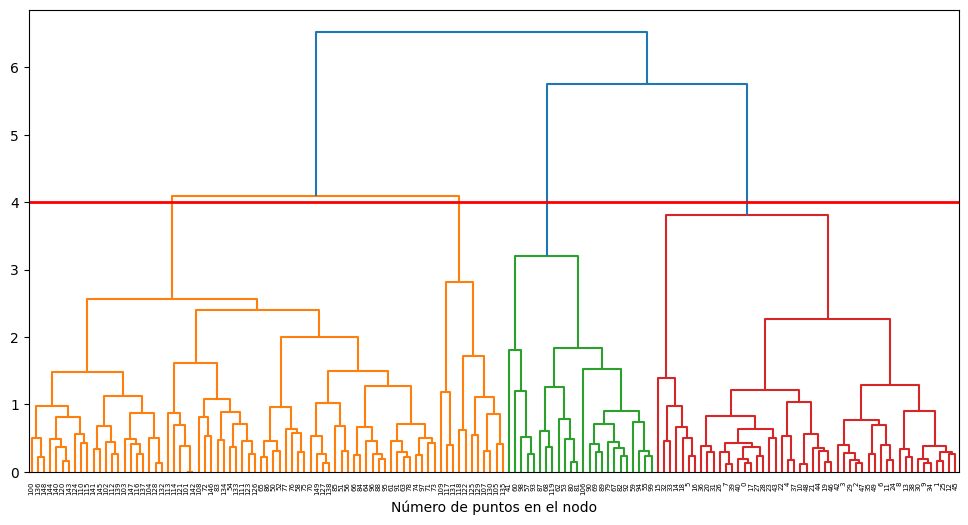

In [23]:
from scipy.cluster.hierarchy import cut_tree

# Para ver las etiquetas de clusters
# Si cortamos donde la altura es 4
labels_cut4 = cut_tree(linkage_data , height=4).reshape(-1)
print(labels_cut4)

fig, ax = plt.subplots(figsize=(12,6))
dendrogram(linkage_data)
ax.set_xlabel("Número de puntos en el nodo")
ax.axhline(4, c='red', linewidth=2) # línea horizontal en 4
fig.show()


In [24]:
# Si queremos 3 clusters
labels_clust3 = cut_tree(linkage_data, n_clusters=3).reshape(-1)
print(labels_clust3)

pd.crosstab(pd.Series(labels_clust3, name='HClust'), pd.Series(y, name='Target'))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 2 1 2 2 2 2 1 1 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Target,0,1,2
HClust,,,
0,49,0,0
1,1,21,2
2,0,29,48


Mismo ejemplo usando Agglomerative Clustering de Scikitlearn

In [ ]:
ac = AgglomerativeClustering(n_clusters=3, # chose 3 since we know the iris dataset has three different species
                             linkage='complete')
ac_labels = ac.fit_predict(X_std)
print(f'Cluster labels: {ac_labels}')
pd.crosstab(pd.Series(ac_labels, name='Agglomerative Clustering'), pd.Series(y, name='Target'))

In [ ]:
# Comprobamos que aunque los nombres de las etiquetas cambian, las observaciones quedan clasificadas en los mismos clusters
pd.crosstab(pd.Series(labels_clust3, name='HClust'),pd.Series(ac_labels, name='Agglomerative Clustering'))